In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

from xgboost import XGBClassifier
from sklearn.metrics import log_loss

### Import Dataframe

In [2]:
# Load the dataset from a Folder called Datasets, plaed inside C drive.
df_raw = pd.read_csv("Crime_Data_from_2020_to_Present.csv", low_memory="False")
df_raw

,,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,211507896,4/11/2021 0:00,11/7/2020 0:00,845,15,N Hollywood,1502,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,7800 BEEMAN AV,NaN,34.2124,-118.4092
1,201516622,10/21/2020 12:00:00 AM,10/18/2020 12:00:00 AM,1845,15,N Hollywood,1521,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,ATOLL AV,N GAULT,34.1993,-118.4203
2,240913563,12/10/2024 0:00,10/30/2020 12:00:00 AM,1240,9,Van Nuys,933,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,14600 SYLVAN ST,NaN,34.1847,-118.4509
3,210704711,12/24/2020 12:00:00 AM,12/24/2020 12:00:00 AM,1310,7,Wilshire,782,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,...,IC,Invest Cont,331.0,NaN,NaN,NaN,6000 COMEY AV,NaN,34.0339,-118.3747
4,201418201,10/3/2020 0:00,09/29/2020 12:00:00 AM,1830,14,Pacific,1454,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,IC,Invest Cont,420.0,NaN,NaN,NaN,4700 LA VILLA MARINA,NaN,33.9813,-118.4350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004986,252104112,2/2/2025 0:00,2/2/2025 0:00,130,21,Topanga,2103,2,946,OTHER MISCELLANEOUS CRIME,...,IC,Invest Cont,946.0,NaN,NaN,NaN,22100 ROSCOE BL,NaN,34.2259,-118.6126
1004987,250404100,02/18/2025 12:00:00 AM,02/18/2025 12:00:00 AM,1000,4,Hollenbeck,479,2,237,CHILD NEGLECT (SEE 300 W.I.C.),...,IC,Invest Cont,237.0,NaN,NaN,NaN,3500 PERCY ST,NaN,34.0277,-118.1979
1004988,251304095,01/31/2025 12:00:00 AM,01/30/2025 12:00:00 AM,1554,13,Newton,1372,2,850,INDECENT EXPOSURE,...,IC,Invest Cont,850.0,NaN,NaN,NaN,300 E 53RD ST,NaN,33.9942,-118.2701
1004989,251704066,01/17/2025 12:00:00 AM,01/17/2025 12:00:00 AM,1600,17,Devonshire,1774,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,9600 ZELZAH AV,NaN,34.2450,-118.5233


In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004991 entries, 0 to 1004990
Data columns (total 28 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0                   1004991 non-null  int64  
 1   Date Rptd       1004991 non-null  object 
 2   DATE OCC        1004991 non-null  object 
 3   TIME OCC        1004991 non-null  int64  
 4   AREA            1004991 non-null  int64  
 5   AREA NAME       1004991 non-null  object 
 6   Rpt Dist No     1004991 non-null  int64  
 7   Part 1-2        1004991 non-null  int64  
 8   Crm Cd          1004991 non-null  int64  
 9   Crm Cd Desc     1004991 non-null  object 
 10  Mocodes         853372 non-null   object 
 11  Vict Age        1004991 non-null  int64  
 12  Vict Sex        860347 non-null   object 
 13  Vict Descent    860335 non-null   object 
 14  Premis Cd       1004975 non-null  float64
 15  Premis Desc     1004403 non-null  object 
 16  Weapon Used Cd  327247 non-null   fl

### View Unique values for Crimes

In [4]:
unique_desc = df_raw["Crm Cd Desc"].dropna().unique()
len(unique_desc), unique_desc

(140,
 array(['THEFT OF IDENTITY',
        'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT',
        'THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)',
        'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)',
        'CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)',
        'VEHICLE - STOLEN', 'BURGLARY', 'BURGLARY FROM VEHICLE',
        'THEFT PLAIN - PETTY ($950 & UNDER)',
        'INTIMATE PARTNER - SIMPLE ASSAULT', 'BATTERY - SIMPLE ASSAULT',
        'VANDALISM - MISDEAMEANOR ($399 OR UNDER)',
        'VEHICLE - ATTEMPT STOLEN',
        'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)',
        'ROBBERY', 'FIREARMS RESTRAINING ORDER (FIREARMS RO)',
        'BIKE - STOLEN', 'EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)',
        'CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT',
        'CRIMINAL THREATS - NO WEAPON DISPLAYED',
        'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD',
        'BATTERY WITH SEXUAL CONTACT',
        'LETTERS, LEWD  -  TELEPHONE

## DataPrep

### Map each Crime commited to a matching Criminal Offense

In [5]:
# Keyword-based mapping rules for auto‐labeling
mapping_rules = {
    "Violent Crime": [
        "ASSAULT", "BATTERY", "HOMICIDE", "MANSLAUGHTER", "RAPE",
        "SEXUAL", "SODOMY", "ORAL COPULATION", "KIDNAPPING",
        "LYNCHING", "STALKING", "THREATS", "INTIMATE PARTNER"
    ],
    "Property Crime": [
        "THEFT", "BURGLARY", "VANDALISM", "ARSON", "SHOPLIFTING",
        "BIKE - STOLEN", "COIN MACHINE"
    ],
    "Vehicle Crime": [
        "VEHICLE", "DRIVING WITHOUT OWNER CONSENT", "DWOC"
    ],
    "Fraud / Financial Crime": [
        "FRAUD", "EMBEZZLEMENT", "COUNTERFEIT", "BUNCO",
        "CREDIT CARD", "DOCUMENT WORTHLESS", "INSURANCE"
    ],
    "Weapons / Public Safety": [
        "FIREARM", "WEAPON", "SHOTS FIRED", "BOMB", "BRANDISH"
    ],
    "Sex Crime": [
        "LEWD", "INDECENT EXPOSURE", "CHILD PORNOGRAPHY",
        "PANDERING", "PIMPING", "HUMAN TRAFFICKING"
    ],
    "Child-Related Crime": [
        "CHILD", "CONTRIBUTING", "CHILD NEGLECT"
    ],
    "Court / Restraining Order / Legal": [
        "COURT", "RESTRAINING", "CONTEMPT", "FAILURE TO APPEAR",
        "VIOLATION"
    ],
    "Public Disturbance / Disorder": [
        "DISTURBANCE", "PEACE", "TRESPASS", "DISRUPT",
        "RIOT", "DISOBEY"
    ],
    "Other Crime": []  # fallback
}

# Function to classify crimes
def classify(description: str):
    if not isinstance(description, str):
        return "Other Crime"
    desc = description.upper()
    for category, keywords in mapping_rules.items():
        for kw in keywords:
            if kw in desc:
                return category
    return "Other Crime"

# Create new class column
df_raw["Crime_Class"] = df_raw["Crm Cd Desc"].apply(classify)

# Save a preview
preview = df_raw[["Crm Cd Desc", "Crime_Class"]].head(30)
preview

,Crm Cd Desc,Crime_Class
0,THEFT OF IDENTITY,Property Crime
1,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",Violent Crime
2,THEFT OF IDENTITY,Property Crime
3,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,Property Crime
4,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),Property Crime
5,THEFT OF IDENTITY,Property Crime
6,THEFT OF IDENTITY,Property Crime
7,CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 ...,Other Crime
8,THEFT OF IDENTITY,Property Crime
9,THEFT OF IDENTITY,Property Crime


In [6]:
df_raw['Crime_Class'].value_counts().reset_index(name='Count')

,Crime_Class,Count
0,Property Crime,508444
1,Violent Crime,233487
2,Vehicle Crime,123445
3,Other Crime,63036
4,Court / Restraining Order / Legal,21771
5,Public Disturbance / Disorder,19977
6,Weapons / Public Safety,19431
7,Sex Crime,11870
8,Child-Related Crime,2784
9,Fraud / Financial Crime,746


### Data Cleaning

Check for Duplicates

In [7]:
df_new = df_raw.drop_duplicates()
df_new

,,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,Crime_Class
0,211507896,4/11/2021 0:00,11/7/2020 0:00,845,15,N Hollywood,1502,2,354,THEFT OF IDENTITY,...,Invest Cont,354.0,NaN,NaN,NaN,7800 BEEMAN AV,NaN,34.2124,-118.4092,Property Crime
1,201516622,10/21/2020 12:00:00 AM,10/18/2020 12:00:00 AM,1845,15,N Hollywood,1521,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,Invest Cont,230.0,NaN,NaN,NaN,ATOLL AV,N GAULT,34.1993,-118.4203,Violent Crime
2,240913563,12/10/2024 0:00,10/30/2020 12:00:00 AM,1240,9,Van Nuys,933,2,354,THEFT OF IDENTITY,...,Invest Cont,354.0,NaN,NaN,NaN,14600 SYLVAN ST,NaN,34.1847,-118.4509,Property Crime
3,210704711,12/24/2020 12:00:00 AM,12/24/2020 12:00:00 AM,1310,7,Wilshire,782,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,...,Invest Cont,331.0,NaN,NaN,NaN,6000 COMEY AV,NaN,34.0339,-118.3747,Property Crime
4,201418201,10/3/2020 0:00,09/29/2020 12:00:00 AM,1830,14,Pacific,1454,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,Invest Cont,420.0,NaN,NaN,NaN,4700 LA VILLA MARINA,NaN,33.9813,-118.4350,Property Crime
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004986,252104112,2/2/2025 0:00,2/2/2025 0:00,130,21,Topanga,2103,2,946,OTHER MISCELLANEOUS CRIME,...,Invest Cont,946.0,NaN,NaN,NaN,22100 ROSCOE BL,NaN,34.2259,-118.6126,Other Crime
1004987,250404100,02/18/2025 12:00:00 AM,02/18/2025 12:00:00 AM,1000,4,Hollenbeck,479,2,237,CHILD NEGLECT (SEE 300 W.I.C.),...,Invest Cont,237.0,NaN,NaN,NaN,3500 PERCY ST,NaN,34.0277,-118.1979,Child-Related Crime
1004988,251304095,01/31/2025 12:00:00 AM,01/30/2025 12:00:00 AM,1554,13,Newton,1372,2,850,INDECENT EXPOSURE,...,Invest Cont,850.0,NaN,NaN,NaN,300 E 53RD ST,NaN,33.9942,-118.2701,Sex Crime
1004989,251704066,01/17/2025 12:00:00 AM,01/17/2025 12:00:00 AM,1600,17,Devonshire,1774,2,624,BATTERY - SIMPLE ASSAULT,...,Invest Cont,624.0,NaN,NaN,NaN,9600 ZELZAH AV,NaN,34.2450,-118.5233,Violent Crime


### Removing Columns 
Do not proceed without caution. In this context, the chosen columns were dropped due to them having a direct relationship to the target class, which may cause a leakage.

In [8]:
df_new = df_new.drop(columns=["Crm Cd Desc", "Crm Cd", "Premis Cd", "Premis Desc", "Crm Cd 1", "Crm Cd 2", "Crm Cd 3", "Crm Cd 4"])
df_new

,,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Mocodes,Vict Age,...,Vict Descent,Weapon Used Cd,Weapon Desc,Status,Status Desc,LOCATION,Cross Street,LAT,LON,Crime_Class
0,211507896,4/11/2021 0:00,11/7/2020 0:00,845,15,N Hollywood,1502,2,377,31,...,H,NaN,NaN,IC,Invest Cont,7800 BEEMAN AV,NaN,34.2124,-118.4092,Property Crime
1,201516622,10/21/2020 12:00:00 AM,10/18/2020 12:00:00 AM,1845,15,N Hollywood,1521,1,0416 0334 2004 1822 1414 0305 0319 0400,32,...,H,200.0,KNIFE WITH BLADE 6INCHES OR LESS,IC,Invest Cont,ATOLL AV,N GAULT,34.1993,-118.4203,Violent Crime
2,240913563,12/10/2024 0:00,10/30/2020 12:00:00 AM,1240,9,Van Nuys,933,2,377,30,...,W,NaN,NaN,IC,Invest Cont,14600 SYLVAN ST,NaN,34.1847,-118.4509,Property Crime
3,210704711,12/24/2020 12:00:00 AM,12/24/2020 12:00:00 AM,1310,7,Wilshire,782,1,344,47,...,A,NaN,NaN,IC,Invest Cont,6000 COMEY AV,NaN,34.0339,-118.3747,Property Crime
4,201418201,10/3/2020 0:00,09/29/2020 12:00:00 AM,1830,14,Pacific,1454,1,1300 0344 1606 2032,63,...,H,NaN,NaN,IC,Invest Cont,4700 LA VILLA MARINA,NaN,33.9813,-118.4350,Property Crime
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004986,252104112,2/2/2025 0:00,2/2/2025 0:00,130,21,Topanga,2103,2,NaN,35,...,X,NaN,NaN,IC,Invest Cont,22100 ROSCOE BL,NaN,34.2259,-118.6126,Other Crime
1004987,250404100,02/18/2025 12:00:00 AM,02/18/2025 12:00:00 AM,1000,4,Hollenbeck,479,2,1258 0553 0602,11,...,B,NaN,NaN,IC,Invest Cont,3500 PERCY ST,NaN,34.0277,-118.1979,Child-Related Crime
1004988,251304095,01/31/2025 12:00:00 AM,01/30/2025 12:00:00 AM,1554,13,Newton,1372,2,NaN,16,...,H,NaN,NaN,IC,Invest Cont,300 E 53RD ST,NaN,33.9942,-118.2701,Sex Crime
1004989,251704066,01/17/2025 12:00:00 AM,01/17/2025 12:00:00 AM,1600,17,Devonshire,1774,2,0400 1259 1822 0356,17,...,H,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,9600 ZELZAH AV,NaN,34.2450,-118.5233,Violent Crime


### Standardization

In this phase, TAKE NOTE that anything, once you hit run, results in the dataframe being permanently changed. So to rerun this segment, you MUST reload and reimport the DataFrame again.

In [9]:
# 1. Clean DATE OCC (mixed formats)
df_new['DATE OCC'] = pd.to_datetime(df_new['DATE OCC'], format='mixed', errors='coerce')

# 2. Clean TIME OCC (force numeric → Int64 → 4-digit HHMM)
df_new['TIME OCC'] = pd.to_numeric(df_new['TIME OCC'], errors='coerce').astype('Int64')
time_str = df_new['TIME OCC'].astype(str).str.zfill(4)

# 3. Combine DATE OCC + TIME OCC into a single datetime
df_new['DateTime OCC'] = pd.to_datetime(
    df_new['DATE OCC'].dt.strftime('%Y-%m-%d') + ' ' + time_str,
    errors='coerce'
)

# 4. Drop the original columns used for merging
df_new = df_new.drop(columns=['DATE OCC', 'TIME OCC'])

df_new

,,Date Rptd,AREA,AREA NAME,Rpt Dist No,Part 1-2,Mocodes,Vict Age,Vict Sex,Vict Descent,Weapon Used Cd,Weapon Desc,Status,Status Desc,LOCATION,Cross Street,LAT,LON,Crime_Class,DateTime OCC
0,211507896,4/11/2021 0:00,15,N Hollywood,1502,2,377,31,M,H,NaN,NaN,IC,Invest Cont,7800 BEEMAN AV,NaN,34.2124,-118.4092,Property Crime,2020-11-07 08:45:00
1,201516622,10/21/2020 12:00:00 AM,15,N Hollywood,1521,1,0416 0334 2004 1822 1414 0305 0319 0400,32,M,H,200.0,KNIFE WITH BLADE 6INCHES OR LESS,IC,Invest Cont,ATOLL AV,N GAULT,34.1993,-118.4203,Violent Crime,2020-10-18 18:45:00
2,240913563,12/10/2024 0:00,9,Van Nuys,933,2,377,30,M,W,NaN,NaN,IC,Invest Cont,14600 SYLVAN ST,NaN,34.1847,-118.4509,Property Crime,2020-10-30 12:40:00
3,210704711,12/24/2020 12:00:00 AM,7,Wilshire,782,1,344,47,F,A,NaN,NaN,IC,Invest Cont,6000 COMEY AV,NaN,34.0339,-118.3747,Property Crime,2020-12-24 13:10:00
4,201418201,10/3/2020 0:00,14,Pacific,1454,1,1300 0344 1606 2032,63,M,H,NaN,NaN,IC,Invest Cont,4700 LA VILLA MARINA,NaN,33.9813,-118.4350,Property Crime,2020-09-29 18:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004986,252104112,2/2/2025 0:00,21,Topanga,2103,2,NaN,35,M,X,NaN,NaN,IC,Invest Cont,22100 ROSCOE BL,NaN,34.2259,-118.6126,Other Crime,2025-02-02 01:30:00
1004987,250404100,02/18/2025 12:00:00 AM,4,Hollenbeck,479,2,1258 0553 0602,11,M,B,NaN,NaN,IC,Invest Cont,3500 PERCY ST,NaN,34.0277,-118.1979,Child-Related Crime,2025-02-18 10:00:00
1004988,251304095,01/31/2025 12:00:00 AM,13,Newton,1372,2,NaN,16,F,H,NaN,NaN,IC,Invest Cont,300 E 53RD ST,NaN,33.9942,-118.2701,Sex Crime,2025-01-30 15:54:00
1004989,251704066,01/17/2025 12:00:00 AM,17,Devonshire,1774,2,0400 1259 1822 0356,17,M,H,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,9600 ZELZAH AV,NaN,34.2450,-118.5233,Violent Crime,2025-01-17 16:00:00


### Check for NULL values

In [10]:
df_new.isna().sum()

                       0
Date Rptd              0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Mocodes           151619
Vict Age               0
Vict Sex          144644
Vict Descent      144656
Weapon Used Cd    677744
Weapon Desc       677744
Status                 1
Status Desc            0
LOCATION               0
Cross Street      850755
LAT                    0
LON                    0
Crime_Class            0
DateTime OCC           0
dtype: int64

Leave as NULL, since some records do in fact not possess the given info.

In [11]:
df_new = df_new.drop(columns=[' '])
df_new

,Date Rptd,AREA,AREA NAME,Rpt Dist No,Part 1-2,Mocodes,Vict Age,Vict Sex,Vict Descent,Weapon Used Cd,Weapon Desc,Status,Status Desc,LOCATION,Cross Street,LAT,LON,Crime_Class,DateTime OCC
0,4/11/2021 0:00,15,N Hollywood,1502,2,377,31,M,H,NaN,NaN,IC,Invest Cont,7800 BEEMAN AV,NaN,34.2124,-118.4092,Property Crime,2020-11-07 08:45:00
1,10/21/2020 12:00:00 AM,15,N Hollywood,1521,1,0416 0334 2004 1822 1414 0305 0319 0400,32,M,H,200.0,KNIFE WITH BLADE 6INCHES OR LESS,IC,Invest Cont,ATOLL AV,N GAULT,34.1993,-118.4203,Violent Crime,2020-10-18 18:45:00
2,12/10/2024 0:00,9,Van Nuys,933,2,377,30,M,W,NaN,NaN,IC,Invest Cont,14600 SYLVAN ST,NaN,34.1847,-118.4509,Property Crime,2020-10-30 12:40:00
3,12/24/2020 12:00:00 AM,7,Wilshire,782,1,344,47,F,A,NaN,NaN,IC,Invest Cont,6000 COMEY AV,NaN,34.0339,-118.3747,Property Crime,2020-12-24 13:10:00
4,10/3/2020 0:00,14,Pacific,1454,1,1300 0344 1606 2032,63,M,H,NaN,NaN,IC,Invest Cont,4700 LA VILLA MARINA,NaN,33.9813,-118.4350,Property Crime,2020-09-29 18:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004986,2/2/2025 0:00,21,Topanga,2103,2,NaN,35,M,X,NaN,NaN,IC,Invest Cont,22100 ROSCOE BL,NaN,34.2259,-118.6126,Other Crime,2025-02-02 01:30:00
1004987,02/18/2025 12:00:00 AM,4,Hollenbeck,479,2,1258 0553 0602,11,M,B,NaN,NaN,IC,Invest Cont,3500 PERCY ST,NaN,34.0277,-118.1979,Child-Related Crime,2025-02-18 10:00:00
1004988,01/31/2025 12:00:00 AM,13,Newton,1372,2,NaN,16,F,H,NaN,NaN,IC,Invest Cont,300 E 53RD ST,NaN,33.9942,-118.2701,Sex Crime,2025-01-30 15:54:00
1004989,01/17/2025 12:00:00 AM,17,Devonshire,1774,2,0400 1259 1822 0356,17,M,H,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,9600 ZELZAH AV,NaN,34.2450,-118.5233,Violent Crime,2025-01-17 16:00:00


Remove the Weapon Used Cd column, and change the Weapon Desc column to binary.

In [12]:
# 1. Drop the Weapon Used Cd column (if it exists)
df_new = df_new.drop(columns=['Weapon Used Cd'], errors='ignore')

# 2. Create a binary Weapon_Present column
df_new['Weapon_Present'] = df_new['Weapon Desc'].apply(
    lambda x: 'Present' if pd.notna(x) and str(x).strip() != '' else 'Absent'
)

# 3. (Optional) Drop Weapon Desc if you want to fully remove the text info
df_new = df_new.drop(columns=['Weapon Desc'], errors='ignore')

df_new

,Date Rptd,AREA,AREA NAME,Rpt Dist No,Part 1-2,Mocodes,Vict Age,Vict Sex,Vict Descent,Status,Status Desc,LOCATION,Cross Street,LAT,LON,Crime_Class,DateTime OCC,Weapon_Present
0,4/11/2021 0:00,15,N Hollywood,1502,2,377,31,M,H,IC,Invest Cont,7800 BEEMAN AV,NaN,34.2124,-118.4092,Property Crime,2020-11-07 08:45:00,Absent
1,10/21/2020 12:00:00 AM,15,N Hollywood,1521,1,0416 0334 2004 1822 1414 0305 0319 0400,32,M,H,IC,Invest Cont,ATOLL AV,N GAULT,34.1993,-118.4203,Violent Crime,2020-10-18 18:45:00,Present
2,12/10/2024 0:00,9,Van Nuys,933,2,377,30,M,W,IC,Invest Cont,14600 SYLVAN ST,NaN,34.1847,-118.4509,Property Crime,2020-10-30 12:40:00,Absent
3,12/24/2020 12:00:00 AM,7,Wilshire,782,1,344,47,F,A,IC,Invest Cont,6000 COMEY AV,NaN,34.0339,-118.3747,Property Crime,2020-12-24 13:10:00,Absent
4,10/3/2020 0:00,14,Pacific,1454,1,1300 0344 1606 2032,63,M,H,IC,Invest Cont,4700 LA VILLA MARINA,NaN,33.9813,-118.4350,Property Crime,2020-09-29 18:30:00,Absent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004986,2/2/2025 0:00,21,Topanga,2103,2,NaN,35,M,X,IC,Invest Cont,22100 ROSCOE BL,NaN,34.2259,-118.6126,Other Crime,2025-02-02 01:30:00,Absent
1004987,02/18/2025 12:00:00 AM,4,Hollenbeck,479,2,1258 0553 0602,11,M,B,IC,Invest Cont,3500 PERCY ST,NaN,34.0277,-118.1979,Child-Related Crime,2025-02-18 10:00:00,Absent
1004988,01/31/2025 12:00:00 AM,13,Newton,1372,2,NaN,16,F,H,IC,Invest Cont,300 E 53RD ST,NaN,33.9942,-118.2701,Sex Crime,2025-01-30 15:54:00,Absent
1004989,01/17/2025 12:00:00 AM,17,Devonshire,1774,2,0400 1259 1822 0356,17,M,H,IC,Invest Cont,9600 ZELZAH AV,NaN,34.2450,-118.5233,Violent Crime,2025-01-17 16:00:00,Present


### Dropping columns that provide meaningless value:

Start with obvious ones, Location of the crime will often be unique among all records, but the area/district may not. So it can be dropped.

To do so, apply a test such as Pearson Correlation

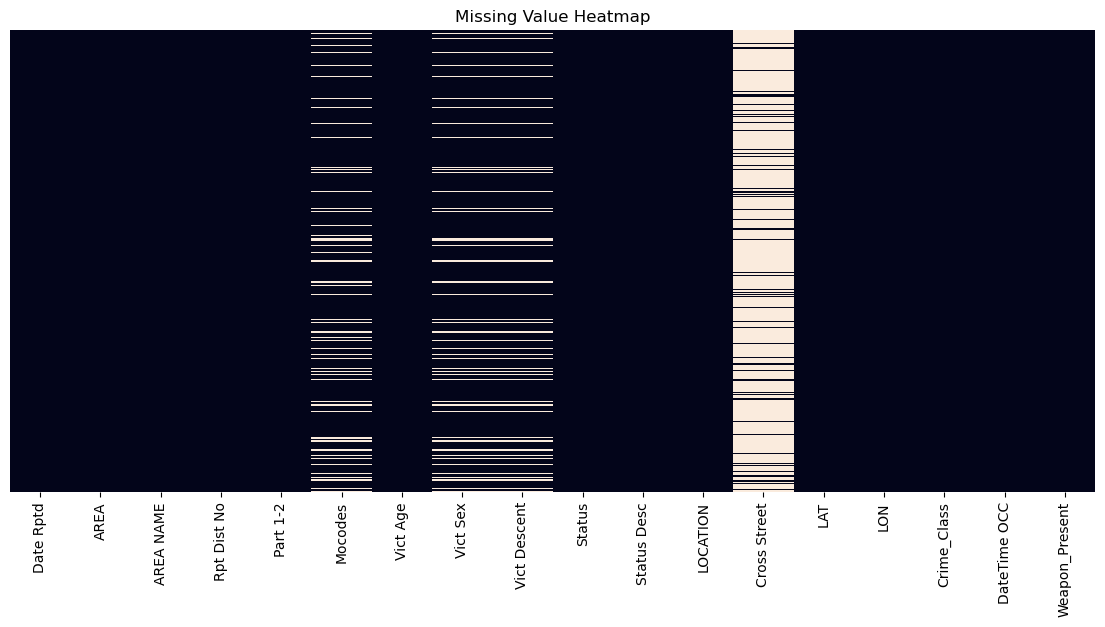

In [13]:
plt.figure(figsize=(14, 6))
sns.heatmap(df_new.isna(), cbar=False, yticklabels=False)
plt.title("Missing Value Heatmap")
plt.show()

Cross Street possess a lot of missing values. This can be dropped completely if Location is already sufficient info.

As for Mo Codes, this is neglectable, since some records may only be a minor offense. So no MO Code may have been recorded.

This applies to victim sex and descent as well, since not all crimes have a victim involved, such as vandalisme.

### Test Pearson Correlation (Numeric Features)

Top 25 strongest Pearson correlations (absolute):
      Feature 1            Feature 2  Correlation
0          AREA          Rpt Dist No     0.999051
18          LAT                  LON    -0.998190
11     Part 1-2             Vict Age     0.206183
17     Vict Age  Crime_Class_numeric    -0.081723
14     Part 1-2  Crime_Class_numeric     0.071209
13     Part 1-2                  LON     0.029212
12     Part 1-2                  LAT    -0.028722
3          AREA                  LAT     0.025338
8   Rpt Dist No                  LAT     0.025077
7   Rpt Dist No             Vict Age     0.022624
2          AREA             Vict Age     0.022593
4          AREA                  LON    -0.010541
9   Rpt Dist No                  LON    -0.010469
1          AREA             Part 1-2     0.007675
6   Rpt Dist No             Part 1-2     0.007489
10  Rpt Dist No  Crime_Class_numeric    -0.003770
5          AREA  Crime_Class_numeric    -0.003678
16     Vict Age                  LON     0.002219


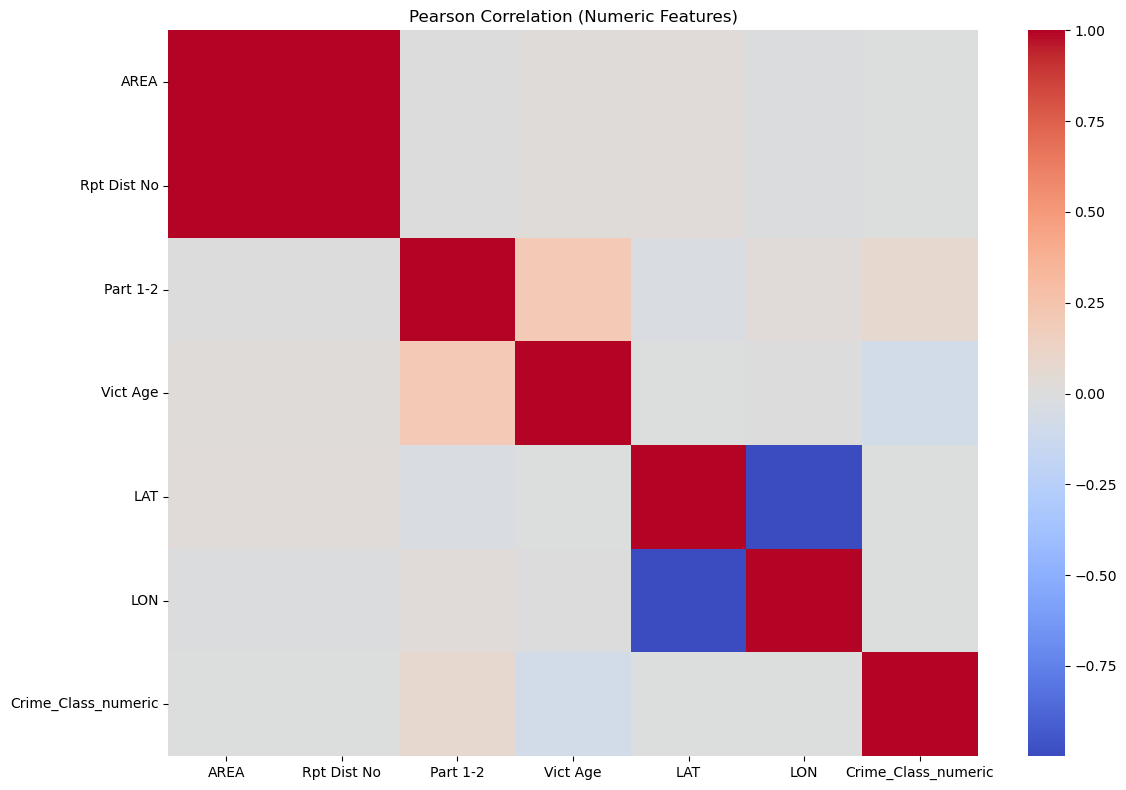

In [14]:
# Choose the DataFrame to analyze; use the most recent processed one if available
try:
    df_corr_source = df_new.copy()
except NameError:
    df_corr_source = df_raw.copy()

# Ensure target encoding (optional): demonstrate correlation against encoded target when present
if 'Crime_Class' in df_corr_source.columns:
    df_corr_source['Crime_Class_numeric'] = df_corr_source['Crime_Class'].astype('category').cat.codes

# Select only numeric columns
num_df = df_corr_source.select_dtypes(include=['number'])

# Pearson correlation matrix
corr = num_df.corr(numeric_only=True)

# Upper triangle flatten for pairwise sorted report
upper = corr.where(~np.tril(np.ones(corr.shape)).astype(bool))
corr_report = (
    upper.stack()
          .reset_index()
          .rename(columns={'level_0': 'Feature 1', 'level_1': 'Feature 2', 0: 'Correlation'})
)

# Sort by absolute correlation strength
corr_report = corr_report.iloc[corr_report['Correlation'].abs().sort_values(ascending=False).index]

# Show top pairs
print("Top 25 strongest Pearson correlations (absolute):")
print(corr_report.head(25))

# Optional: heatmap for a quick visual
plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title('Pearson Correlation (Numeric Features)')
plt.tight_layout()
plt.show()

### What can be derived freom this correlation table?

1. Area and Rpt Dist No are inheritelly the same info, if you know the area where the crime occured, is the specific District Number really required?
2. Many features have a correlation near 0, this implies that many features are highly independent. In  which, leave them be.
3. Latitude and Longitude do provide the coordinates of the crime, but neither predicts each other.

In [15]:
# Make a copy of the data
df_corr = df_new.copy()

# Convert Crime_Class (categorical) → numeric labels
df_corr['Crime_Class_numeric'] = df_corr['Crime_Class'].astype('category').cat.codes

# Select only numeric columns
num_df = df_corr.select_dtypes(include=['number'])

# Compute correlation with the numeric-encoded target
target_corr = num_df.corr(numeric_only=True)['Crime_Class_numeric']

# Remove the target itself
target_corr = target_corr.drop(labels=['Crime_Class_numeric'])

# Turn into sorted dataframe
target_corr_report = (
    target_corr
        .abs()
        .sort_values(ascending=False)
        .rename("Correlation_with_Crime_Class")
        .to_frame()
)

target_corr_report.head(20)


,Correlation_with_Crime_Class
Vict Age,0.081723
Part 1-2,0.071209
Rpt Dist No,0.003770
AREA,0.003678
LAT,0.001563
LON,0.001106


In [16]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004991 entries, 0 to 1004990
Data columns (total 18 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   Date Rptd       1004991 non-null  object        
 1   AREA            1004991 non-null  int64         
 2   AREA NAME       1004991 non-null  object        
 3   Rpt Dist No     1004991 non-null  int64         
 4   Part 1-2        1004991 non-null  int64         
 5   Mocodes         853372 non-null   object        
 6   Vict Age        1004991 non-null  int64         
 7   Vict Sex        860347 non-null   object        
 8   Vict Descent    860335 non-null   object        
 9   Status          1004990 non-null  object        
 10  Status Desc     1004991 non-null  object        
 11  LOCATION        1004991 non-null  object        
 12  Cross Street    154236 non-null   object        
 13  LAT             1004991 non-null  float64       
 14  LON             10

### Let's tackle Mocodes first, these represent a given crime/offense commited. You can find the full list in the file attached.

In [17]:
# --- Step 1: Clean & explode the MO Codes column ---
# Convert NaN to empty string
df_new['Mocodes'] = df_new['Mocodes'].fillna('')

# Split by spaces → expand into list
df_new['MOCODES_LIST'] = df_new['Mocodes'].str.strip().str.split()

# Explode (each code becomes a row)
exploded = df_new.explode('MOCODES_LIST')

Then, extract all unique MO code entries present.

In [18]:
all_codes = sorted({code for sublist in df_new['MOCODES_LIST'] for code in sublist})
print(len(all_codes), "unique MO codes found")

938 unique MO codes found


Count the frequency of each MO Code in the dataset

In [19]:
# --- Step 2: Count MO code frequencies ---
mo_counts = (
    exploded['MOCODES_LIST']
    .value_counts()
)

Select the top 100 MO Codes to keep

In [20]:
# --- Step 3: Select the Top 100 codes ---
top_100 = set(mo_counts.head(100).index)

Filter MO list into top codes and “others”

In [21]:
# --- Step 4: Create one-hot columns for each top code ---
for code in top_100:
    df_new[f"MO_{code}"] = df_new['MOCODES_LIST'].apply(lambda lst: code in lst)

# --- Step 5: Create the OTHERS column ---
# OTHERS = true if the row contains any MO code NOT in the top 100
df_new['MO_OTHERS'] = df_new['MOCODES_LIST'].apply(
    lambda lst: any(code not in top_100 for code in lst)
)

C:\Users\Owner\AppData\Local\Temp\ipykernel_3800\2391797412.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_new[f"MO_{code}"] = df_new['MOCODES_LIST'].apply(lambda lst: code in lst)
C:\Users\Owner\AppData\Local\Temp\ipykernel_3800\2391797412.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_new[f"MO_{code}"] = df_new['MOCODES_LIST'].apply(lambda lst: code in lst)
C:\Users\Owner\AppData\Local\Temp\ipykernel_3800\2391797412.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling

Filter each crime’s MO list to only keep top 100 codes, create an Others column to store everything else.

Multi-hot encode only the top 100 codes

In [22]:
# --- Step 6: Convert booleans to integers (0/1) ---
mo_cols = [col for col in df_new.columns if col.startswith("MO_")]
df_new[mo_cols] = df_new[mo_cols].astype(int)

# --- Step 7: Clean up temporary column ---
df_new_1 = df_new.drop(columns=["MOCODES_LIST"])

# --- Done ---
print(f"Created {len(mo_cols)} MO Code features (100 Top + OTHERS).")
print(mo_cols[:10])

Created 101 MO Code features (100 Top + OTHERS).
['MO_2028', 'MO_1501', 'MO_0321', 'MO_1810', 'MO_0602', 'MO_2024', 'MO_0385', 'MO_1609', 'MO_0906', 'MO_0209']


In [23]:
df_new_1 = df_new_1.drop(columns=['Mocodes'], errors='ignore')
df_new_1

,Date Rptd,AREA,AREA NAME,Rpt Dist No,Part 1-2,Vict Age,Vict Sex,Vict Descent,Status,Status Desc,...,MO_0701,MO_0417,MO_0444,MO_1259,MO_0929,MO_1601,MO_2004,MO_1251,MO_1407,MO_OTHERS
0,4/11/2021 0:00,15,N Hollywood,1502,2,31,M,H,IC,Invest Cont,...,0,0,0,0,0,0,0,0,0,1
1,10/21/2020 12:00:00 AM,15,N Hollywood,1521,1,32,M,H,IC,Invest Cont,...,0,0,0,0,0,0,1,0,0,0
2,12/10/2024 0:00,9,Van Nuys,933,2,30,M,W,IC,Invest Cont,...,0,0,0,0,0,0,0,0,0,1
3,12/24/2020 12:00:00 AM,7,Wilshire,782,1,47,F,A,IC,Invest Cont,...,0,0,0,0,0,0,0,0,0,0
4,10/3/2020 0:00,14,Pacific,1454,1,63,M,H,IC,Invest Cont,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004986,2/2/2025 0:00,21,Topanga,2103,2,35,M,X,IC,Invest Cont,...,0,0,0,0,0,0,0,0,0,0
1004987,02/18/2025 12:00:00 AM,4,Hollenbeck,479,2,11,M,B,IC,Invest Cont,...,0,0,0,0,0,0,0,0,0,1
1004988,01/31/2025 12:00:00 AM,13,Newton,1372,2,16,F,H,IC,Invest Cont,...,0,0,0,0,0,0,0,0,0,0
1004989,01/17/2025 12:00:00 AM,17,Devonshire,1774,2,17,M,H,IC,Invest Cont,...,0,0,0,1,0,0,0,0,0,0


## Manually take out 30% to analysis and the remaining do validation and train

In [24]:
# ----------------------------
# 1. Convert date column
# ----------------------------
df_new_1["Date Rptd"] = pd.to_datetime(df_new_1["Date Rptd"], errors="coerce")
df_new_1["YEAR"] = df_new_1["Date Rptd"].dt.year

# ----------------------------
# 2. Filter only years 2024 & 2025
# ----------------------------
df_filtered = df_new_1[df_new_1["YEAR"].isin([2024, 2025])].copy()

# Remove YEAR column
df_filtered = df_filtered.drop(columns=["YEAR"])

print("Total rows (2024 & 2025):", len(df_filtered))

# ----------------------------
# 3. Manually split 70% / 30%
# ----------------------------
df_filtered = df_filtered.sample(frac=1, random_state=42)   # Shuffle

split_point = int(len(df_filtered) * 0.70)

train_validate_df = df_filtered.iloc[:split_point]   # 70%
analysis_df = df_filtered.iloc[split_point:]         # 30%

# ----------------------------
# 4. Show results
# ----------------------------
print("\n===== SPLIT RESULT =====")
print(f"Train/Validate rows : {len(train_validate_df)} ({len(train_validate_df)/len(df_filtered):.1%})")
print(f"Analysis rows       : {len(analysis_df)} ({len(analysis_df)/len(df_filtered):.1%})")

# ----------------------------
# 5. Show samples
# ----------------------------
print("\n===== TRAIN/VALIDATE SAMPLE =====")
display(train_validate_df.head())

print("\n===== ANALYSIS SAMPLE =====")
display(analysis_df.head())


C:\Users\Owner\AppData\Local\Temp\ipykernel_3800\338246235.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_new_1["YEAR"] = df_new_1["Date Rptd"].dt.year


Total rows (2024 & 2025): 54939

===== SPLIT RESULT =====
Train/Validate rows : 38457 (70.0%)
Analysis rows       : 16482 (30.0%)

===== TRAIN/VALIDATE SAMPLE =====


,Date Rptd,AREA,AREA NAME,Rpt Dist No,Part 1-2,Vict Age,Vict Sex,Vict Descent,Status,Status Desc,...,MO_0701,MO_0417,MO_0444,MO_1259,MO_0929,MO_1601,MO_2004,MO_1251,MO_1407,MO_OTHERS
939460,2024-05-07,11,Northeast,1139,1,0,X,X,IC,Invest Cont,...,0,0,0,0,0,0,0,0,0,0
897335,2024-03-05,18,Southeast,1829,2,24,F,B,IC,Invest Cont,...,0,0,0,0,0,0,0,0,0,0
975202,2024-07-07,21,Topanga,2115,1,0,NaN,NaN,IC,Invest Cont,...,0,0,0,0,0,0,0,0,0,0
959364,2024-01-10,13,Newton,1353,1,46,M,H,IC,Invest Cont,...,0,0,0,0,0,0,0,0,0,0
871607,2024-07-09,16,Foothill,1633,2,0,X,X,AO,Adult Other,...,0,0,0,0,0,0,0,0,0,0



===== ANALYSIS SAMPLE =====


,Date Rptd,AREA,AREA NAME,Rpt Dist No,Part 1-2,Vict Age,Vict Sex,Vict Descent,Status,Status Desc,...,MO_0701,MO_0417,MO_0444,MO_1259,MO_0929,MO_1601,MO_2004,MO_1251,MO_1407,MO_OTHERS
985244,2024-12-09,6,Hollywood,643,1,0,NaN,NaN,IC,Invest Cont,...,0,0,0,0,0,0,0,0,0,0
949795,2024-03-11,12,77th Street,1268,1,57,M,B,IC,Invest Cont,...,0,0,0,0,0,0,1,0,0,0
892098,2024-04-09,2,Rampart,238,2,30,M,H,IC,Invest Cont,...,0,0,0,0,0,0,0,0,0,0
991471,2024-04-03,2,Rampart,239,1,0,NaN,NaN,AO,Adult Other,...,0,0,0,0,0,0,0,0,0,0
888102,2024-02-03,16,Foothill,1656,1,0,NaN,NaN,IC,Invest Cont,...,0,0,0,0,0,0,0,0,0,0


## XGBoost (With Parameter)

In [26]:
print("=== FAST & MEMORY-EFFICIENT XGBOOST TRAINING ===")

import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from scipy.stats import randint, uniform

# ============================================================
# PREPROCESSING (same as before)
# ============================================================

df_model_2 = df_new_1.copy()

X = df_model_2.drop(columns=["Crime_Class"])
# Keep y as a pandas Series instead of numpy array
y = pd.Series(pd.factorize(df_model_2["Crime_Class"])[0])


for col in X.select_dtypes(include=["datetime", "datetimetz"]).columns:
    X[col] = X[col].view("int64")

for col in X.columns:
    if X[col].apply(lambda x: isinstance(x, list)).any():
        X[col] = X[col].astype(str)

X = X.apply(lambda col: pd.factorize(col)[0] if col.dtype == "object" else col)
X = X.astype("float32")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# ============================================================
# TINY SUBSAMPLE FOR FAST TUNING
# ============================================================

tune_size = 10000
X_tune = X_train.sample(tune_size, random_state=42)
y_tune = y_train[X_tune.index]

print(f"Tuning using {len(X_tune):,} rows")

# ============================================================
# FAST XGBOOST RANDOMIZED SEARCH
# ============================================================

xgb_base = XGBClassifier(
    objective="multi:softmax",
    num_class=len(np.unique(y)),
    eval_metric="mlogloss",
    tree_method="hist",
    random_state=42,
    n_jobs=-1
)

param_dist = {
    "max_depth": randint(4, 10),
    "learning_rate": uniform(0.03, 0.2),
    "min_child_weight": randint(1, 6),
    "subsample": uniform(0.5, 0.5),
    "colsample_bytree": uniform(0.5, 0.5),
    "n_estimators": randint(150, 400)
}

search = RandomizedSearchCV(
    xgb_base,
    param_distributions=param_dist,
    n_iter=15,        # FAST
    cv=2,
    scoring="accuracy",
    random_state=42,
    n_jobs=-1,
    verbose=1
)

search.fit(X_tune, y_tune)

print("\nBest Params:", search.best_params_)

# ============================================================
# TRAIN FINAL MODEL ON FULL DATASET
# ============================================================

xgb_final = XGBClassifier(
    objective="multi:softmax",
    num_class=len(np.unique(y)),
    eval_metric="mlogloss",
    tree_method="hist",
    random_state=42,
    n_jobs=-1,
    **search.best_params_
)

xgb_final.fit(X_train, y_train)

# ============================================================
# EVALUATION
# ============================================================

y_pred_train = xgb_final.predict(X_train)
y_pred_test = xgb_final.predict(X_test)

print("Training Accuracy:", accuracy_score(y_train, y_pred_train))
print("Testing Accuracy:", accuracy_score(y_test, y_pred_test))

print("\nTRAIN REPORT")
print(classification_report(y_train, y_pred_train))

print("\nTEST REPORT")
print(classification_report(y_test, y_pred_test))


=== FAST & MEMORY-EFFICIENT XGBOOST TRAINING ===


C:\Users\Owner\AppData\Local\Temp\ipykernel_16740\516965044.py:21: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  X[col] = X[col].view("int64")
C:\Users\Owner\AppData\Local\Temp\ipykernel_16740\516965044.py:21: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  X[col] = X[col].view("int64")


Tuning using 10,000 rows
Fitting 2 folds for each of 15 candidates, totalling 30 fits

Best Params: {'colsample_bytree': np.float64(0.7713480415791243), 'learning_rate': np.float64(0.05818484499495253), 'max_depth': 8, 'min_child_weight': 1, 'n_estimators': 238, 'subsample': np.float64(0.9934434683002586)}
Training Accuracy: 0.9207909673585949
Testing Accuracy: 0.9147921379246297

TRAIN REPORT
              precision    recall  f1-score   support

           0       0.95      0.94      0.95    356035
           1       0.94      0.98      0.96    163391
           2       0.87      0.65      0.75     44202
           3       0.82      0.96      0.89     86340
           4       0.81      0.80      0.80     13595
           5       0.89      0.62      0.73      8282
           6       0.95      0.95      0.95     15207
           7       0.76      0.74      0.75     13944
           8       1.00      0.13      0.23       540
           9       0.80      0.70      0.74      1957

    acc

In [27]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import numpy as np

print("=== XGBOOST Cross-Validation: Stratified Shuffle-Split ===\n")

# ------------------------------------------------------------
# Use your tuned parameters
# ------------------------------------------------------------
best_params = search.best_params_
print("Using Best Params:", best_params, "\n")

sss = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=42)

accuracies = []
fold = 1

for train_idx, test_idx in sss.split(X, y):
    X_train_cv, X_test_cv = X.iloc[train_idx], X.iloc[test_idx]
    y_train_cv, y_test_cv = y.iloc[train_idx], y.iloc[test_idx]

    # --------------------------------------------------------
    # XGBoost model with best params
    # --------------------------------------------------------
    xgb_cv = XGBClassifier(
        objective="multi:softmax",
        num_class=len(np.unique(y)),
        eval_metric="mlogloss",
        tree_method="hist",
        random_state=42,
        n_jobs=-1,
        **best_params
    )

    xgb_cv.fit(X_train_cv, y_train_cv)

    # Predict
    y_pred = xgb_cv.predict(X_test_cv)

    # Accuracy
    acc = accuracy_score(y_test_cv, y_pred)
    accuracies.append(acc)

    print(f"Fold {fold}: Accuracy = {acc:.4f}")
    fold += 1

print("---------------------------------------------------------")
print("Mean Accuracy:  ", np.mean(accuracies))
print("Std Deviation: ", np.std(accuracies))
print("---------------------------------------------------------")


=== XGBOOST Cross-Validation: Stratified Shuffle-Split ===

Using Best Params: {'colsample_bytree': np.float64(0.7713480415791243), 'learning_rate': np.float64(0.05818484499495253), 'max_depth': 8, 'min_child_weight': 1, 'n_estimators': 238, 'subsample': np.float64(0.9934434683002586)} 

Fold 1: Accuracy = 0.9157
Fold 2: Accuracy = 0.9158
Fold 3: Accuracy = 0.9153
Fold 4: Accuracy = 0.9152
Fold 5: Accuracy = 0.9161
---------------------------------------------------------
Mean Accuracy:   0.9156239842387015
Std Deviation:  0.0003130470163172317
---------------------------------------------------------


## ANN (With Parameter)

In [26]:
# ============================================================
# 1. IMPORTS
# ============================================================
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

# ============================================================
# 2. DATA PREPARATION (Your First Block)
# ============================================================
# NOTE: Changed towards the new preprocessed dataframe
df_model_2 = df_new_1.copy()

# Prepare training data
X = df_model_2.drop(columns=["Crime_Class"])
y, unique_classes = pd.factorize(df_model_2["Crime_Class"]) # Capture classes for report later

# ---- FIX 1: Convert datetime columns to int64 ----
for col in X.select_dtypes(include=["datetime64[ns]", "datetimetz"]).columns:
    X[col] = X[col].view("int64")

# ---- FIX 2: Convert lists -> strings to make them hashable ----
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = X[col].apply(lambda x: str(x) if isinstance(x, list) else x)

# Factorize object columns
X = X.apply(lambda col: pd.factorize(col)[0] if col.dtype == "object" else col)

# Handle missing values
X = X.fillna(X.median())

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# ============================================================
# 3. BRIDGE CODE (Crucial Missing Steps)
# ============================================================
# Your ANN expects scaled data and categorical targets, which were missing above.

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# One-hot encode the targets (needed for categorical_crossentropy)
num_classes = len(np.unique(y))
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

# ============================================================
# 4. ANN MODEL SETUP & SEARCH (Your Second Block)
# ============================================================

param_space = {
    "lr": [1e-3, 3e-4, 1e-4],
    "hidden_1": [64, 96, 128],
    "hidden_2": [32, 48, 64],
    "dropout": [0.2, 0.3, 0.4],
    "batch_size": [32, 64, 128]
}

def build_model(params):
    model = Sequential([
        Dense(params["hidden_1"], activation='relu', input_shape=(X_train_scaled.shape[1],)),
        Dropout(params["dropout"]),

        Dense(params["hidden_2"], activation='relu'),
        Dropout(params["dropout"]),

        Dense(32, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])

    model.compile(
        loss='categorical_crossentropy',
        optimizer=Adam(learning_rate=params["lr"]),
        metrics=['accuracy']
    )
    return model

def sample_params():
    return {
        "lr": random.choice(param_space["lr"]),
        "hidden_1": random.choice(param_space["hidden_1"]),
        "hidden_2": random.choice(param_space["hidden_2"]),
        "dropout": random.choice(param_space["dropout"]),
        "batch_size": random.choice(param_space["batch_size"])
    }

search_results = []
N_SEARCH = 4   

print("\n========== STARTING BEST PARAMS SEARCH ==========\n")

for i in range(N_SEARCH):
    params = sample_params()
    print(f"Trial {i+1}/{N_SEARCH}: {params}")

    model = build_model(params)

    es = EarlyStopping(
        monitor='val_loss',
        patience=3,
        restore_best_weights=True
    )

    # SHORT training for search only
    history = model.fit(
        X_train_scaled,
        y_train_cat,
        epochs=8,
        batch_size=params["batch_size"],
        validation_split=0.2,
        verbose=0,
        callbacks=[es]
    )

    val_acc = max(history.history["val_accuracy"])
    search_results.append((val_acc, params))

    print(f" -> Best Val Accuracy: {val_acc:.4f}\n")

# ============================================================
# 5. FINAL TRAINING & EVALUATION
# ============================================================

best_val, best_params = max(search_results, key=lambda x: x[0])
print("\n========== BEST PARAMS FOUND ==========")
print(best_params)
print("Best Validation Accuracy:", best_val)

print("\n========== TRAINING FINAL MODEL ==========\n")

final_model = build_model(best_params)

es_final = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history_final = final_model.fit(
    X_train_scaled,
    y_train_cat,
    epochs=25,
    batch_size=best_params["batch_size"],
    validation_split=0.2,
    verbose=1,
    callbacks=[es_final]
)

# Evaluation
y_pred_train = final_model.predict(X_train_scaled).argmax(axis=1)
y_pred_test = final_model.predict(X_test_scaled).argmax(axis=1)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

print("\n===== TRAINING REPORT =====")
print(pd.DataFrame.from_dict(
    classification_report(y_train, y_pred_train, output_dict=True)
).transpose())

print("\n===== TESTING REPORT =====")
print(pd.DataFrame.from_dict(
    classification_report(y_test, y_pred_test, output_dict=True)
).transpose())

C:\Users\Owner\AppData\Local\Temp\ipykernel_3800\3270069186.py:28: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  X[col] = X[col].view("int64")
C:\Users\Owner\AppData\Local\Temp\ipykernel_3800\3270069186.py:28: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  X[col] = X[col].view("int64")



========== STARTING BEST PARAMS SEARCH ==========

Trial 1/4: {'lr': 0.001, 'hidden_1': 96, 'hidden_2': 48, 'dropout': 0.2, 'batch_size': 64}


C:\Users\Owner\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 -> Best Val Accuracy: 0.9136

Trial 2/4: {'lr': 0.0001, 'hidden_1': 128, 'hidden_2': 64, 'dropout': 0.2, 'batch_size': 128}
 -> Best Val Accuracy: 0.9119

Trial 3/4: {'lr': 0.0001, 'hidden_1': 64, 'hidden_2': 32, 'dropout': 0.2, 'batch_size': 64}
 -> Best Val Accuracy: 0.9101

Trial 4/4: {'lr': 0.0001, 'hidden_1': 128, 'hidden_2': 64, 'dropout': 0.2, 'batch_size': 32}
 -> Best Val Accuracy: 0.9142


========== BEST PARAMS FOUND ==========
{'lr': 0.0001, 'hidden_1': 128, 'hidden_2': 64, 'dropout': 0.2, 'batch_size': 32}
Best Validation Accuracy: 0.9141571521759033

========== TRAINING FINAL MODEL ==========

Epoch 1/25
17588/17588 ━━━━━━━━━━━━━━━━━━━━ 62s 3ms/step - accuracy: 0.8697 - loss: 0.4333 - val_accuracy: 0.9042 - val_loss: 0.3015
Epoch 2/25
17588/17588 ━━━━━━━━━━━━━━━━━━━━ 54s 3ms/step - accuracy: 0.9003 - loss: 0.3149 - val_accuracy: 0.9084 - val_loss: 0.2800
Epoch 3/25
17588/17588 ━━━━━━━━━━━━━━━━━━━━ 54s 3ms/step - accuracy: 0.9046 - loss: 0.2967 - val_accuracy: 0.9102 - va

C:\Users\Owner\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Owner\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Owner\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score        support
0              0.959248  0.935768  0.947362  356035.000000
1              0.943381  0.973964  0.958429  163391.000000
2              0.837845  0.657527  0.736814   44202.000000
3              0.818216  0.960262  0.883566   86340.000000
4              0.785527  0.792056  0.788778   13595.000000
5              0.781389  0.615431  0.688551    8282.000000
6              0.941521  0.920037  0.930655   15207.000000
7              0.702998  0.751649  0.726510   13944.000000
8              0.000000  0.000000  0.000000     540.000000
9              0.680982  0.510475  0.583528    1957.000000
accuracy       0.917723  0.917723  0.917723       0.917723
macro avg      0.745111  0.711717  0.724419  703493.000000
weighted avg   0.918202  0.917723  0.916284  703493.000000

===== TESTING REPORT =====
              precision    recall  f1-score        support
0              0.957995  0.934210  0.945953  152409.000000
1              0.939745  0.9

C:\Users\Owner\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Owner\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Owner\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [27]:
# ============================================================
#                📌 FULL ANN PIPELINE 
# ============================================================

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, ShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

# ============================================================
# PREPROCESSING
# ============================================================

df_model_2 = df_new_1.copy()

X = df_model_2.drop(columns=["Crime_Class"])
y, _ = pd.factorize(df_model_2["Crime_Class"])

# Convert datetime → int64
for col in X.select_dtypes(include=["datetime64[ns]", "datetimetz"]).columns:
    X[col] = X[col].view("int64")

# Convert lists → strings
for col in X.columns:
    if X[col].dtype == "object":
        X[col] = X[col].apply(lambda x: str(x) if isinstance(x, list) else x)

# Factorize object columns
X = X.apply(lambda col: pd.factorize(col)[0] if col.dtype == "object" else col)

# Fill missing values
X = X.fillna(X.median())

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# One-hot encode labels
num_classes = len(np.unique(y))
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

# ============================================================
# BEST PARAMS (From your search)
# ============================================================
best_params = {
    "layer1": 128,
    "layer2": 64,
    "layer3": 32,
    "dropout": 0.3,
    "batch_size": 32,
    "epochs": 10,       # base training
    "lr": 0.001         # default Adam LR
}

# ============================================================
# MODEL BUILDER FUNCTION
# ============================================================

def build_ann():
    model = Sequential([
        Dense(best_params["layer1"], activation='relu', input_shape=(X_train_scaled.shape[1],)),
        Dropout(best_params["dropout"]),

        Dense(best_params["layer2"], activation='relu'),
        Dropout(best_params["dropout"]),

        Dense(best_params["layer3"], activation='relu'),

        Dense(num_classes, activation='softmax')
    ])

    model.compile(
        loss='categorical_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
    )

    return model

# ============================================================
# TRAIN FINAL MODEL
# ============================================================

model = build_ann()

history = model.fit(
    X_train_scaled, y_train_cat,
    epochs=best_params["epochs"],
    batch_size=best_params["batch_size"],
    validation_split=0.2,
    verbose=1
)

# Predict
y_pred_train = model.predict(X_train_scaled).argmax(axis=1)
y_pred_test = model.predict(X_test_scaled).argmax(axis=1)

# Evaluation
train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)

print("Training Accuracy:", train_acc)
print("Testing Accuracy:", test_acc)

print("\nTRAIN REPORT")
print(pd.DataFrame.from_dict(classification_report(y_train, y_pred_train, output_dict=True)).transpose())

print("\nTEST REPORT")
print(pd.DataFrame.from_dict(classification_report(y_test, y_pred_test, output_dict=True)).transpose())

# ============================================================
# SHUFFLE-SPLIT CROSS VALIDATION (FAST + MEMORY EFFICIENT)
# ============================================================

def ann_shuffle_split_cv(n_splits=5):

    ss = ShuffleSplit(n_splits=n_splits, test_size=0.2, random_state=42)
    accuracies = []

    fold = 1
    for train_idx, val_idx in ss.split(X_train_scaled):

        print(f"\n===== ShuffleSplit Fold {fold}/{n_splits} =====")

        X_tr, X_val = X_train_scaled[train_idx], X_train_scaled[val_idx]
        y_tr, y_val = y_train_cat[train_idx], y_train_cat[val_idx]

        model_cv = build_ann()

        es = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

        model_cv.fit(
            X_tr, y_tr,
            epochs=12,  # small for speed
            batch_size=best_params["batch_size"],
            validation_data=(X_val, y_val),
            verbose=0,
            callbacks=[es]
        )

        loss, acc = model_cv.evaluate(X_val, y_val, verbose=0)
        print(f"Fold Accuracy: {acc:.4f}")

        accuracies.append(acc)
        fold += 1

    accuracies = np.array(accuracies)
    print("\n========== SHUFFLE SPLIT SUMMARY ==========")
    print("Accuracies:", accuracies)
    print("Mean CV Accuracy:", accuracies.mean())
    print("Std Deviation:", accuracies.std())
    print("============================================")

    return accuracies.mean(), accuracies.std()

# Run CV
cv_mean, cv_sd = ann_shuffle_split_cv()

C:\Users\Owner\AppData\Local\Temp\ipykernel_3800\1466113304.py:26: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  X[col] = X[col].view("int64")
C:\Users\Owner\AppData\Local\Temp\ipykernel_3800\1466113304.py:26: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  X[col] = X[col].view("int64")
C:\Users\Owner\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
17588/17588 ━━━━━━━━━━━━━━━━━━━━ 110s 5ms/step - accuracy: 0.8947 - loss: 0.3386 - val_accuracy: 0.9087 - val_loss: 0.2763
Epoch 2/10
17588/17588 ━━━━━━━━━━━━━━━━━━━━ 101s 6ms/step - accuracy: 0.9051 - loss: 0.2965 - val_accuracy: 0.9108 - val_loss: 0.2687
Epoch 3/10
17588/17588 ━━━━━━━━━━━━━━━━━━━━ 85s 5ms/step - accuracy: 0.9066 - loss: 0.2891 - val_accuracy: 0.9126 - val_loss: 0.2657
Epoch 4/10
17588/17588 ━━━━━━━━━━━━━━━━━━━━ 82s 5ms/step - accuracy: 0.9074 - loss: 0.2860 - val_accuracy: 0.9122 - val_loss: 0.2640
Epoch 5/10
17588/17588 ━━━━━━━━━━━━━━━━━━━━ 85s 5ms/step - accuracy: 0.9079 - loss: 0.2833 - val_accuracy: 0.9127 - val_loss: 0.2649
Epoch 6/10
17588/17588 ━━━━━━━━━━━━━━━━━━━━ 81s 5ms/step - accuracy: 0.9084 - loss: 0.2823 - val_accuracy: 0.9125 - val_loss: 0.2641
Epoch 7/10
17588/17588 ━━━━━━━━━━━━━━━━━━━━ 79s 4ms/step - accuracy: 0.9085 - loss: 0.2812 - val_accuracy: 0.9129 - val_loss: 0.2636
Epoch 8/10
17588/17588 ━━━━━━━━━━━━━━━━━━━━ 83s 5ms/step - accuracy

C:\Users\Owner\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Owner\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Owner\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score        support
0              0.959437  0.933931  0.946512  356035.000000
1              0.937757  0.973254  0.955176  163391.000000
2              0.838993  0.617619  0.711484   44202.000000
3              0.816394  0.960922  0.882781   86340.000000
4              0.820187  0.708275  0.760134   13595.000000
5              0.732271  0.604685  0.662390    8282.000000
6              0.942269  0.914447  0.928150   15207.000000
7              0.608000  0.809882  0.694569   13944.000000
8              0.000000  0.000000  0.000000     540.000000
9              0.671384  0.436382  0.528956    1957.000000
accuracy       0.913284  0.913284  0.913284       0.913284
macro avg      0.732669  0.695940  0.707015  703493.000000
weighted avg   0.915038  0.913284  0.911710  703493.000000

TEST REPORT
              precision    recall  f1-score        support
0              0.958631  0.932937  0.945610  152409.000000
1              0.936612  0.971967  0.953962

C:\Users\Owner\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Owner\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Owner\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



===== ShuffleSplit Fold 1/5 =====


C:\Users\Owner\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Fold Accuracy: 0.9128

===== ShuffleSplit Fold 2/5 =====
Fold Accuracy: 0.9128

===== ShuffleSplit Fold 3/5 =====
Fold Accuracy: 0.9136

===== ShuffleSplit Fold 4/5 =====
Fold Accuracy: 0.9138

===== ShuffleSplit Fold 5/5 =====
Fold Accuracy: 0.9129

========== SHUFFLE SPLIT SUMMARY ==========
Accuracies: [0.91280675 0.91276413 0.9135744  0.91382313 0.91292757]
Mean CV Accuracy: 0.9131791949272156
Std Deviation: 0.00043477434567159277


## Naive Bayes (With Parameter)

In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# ----------------------------------------------------
# 1. Setup Data (Assuming df_new_1 already exists)
# ----------------------------------------------------
df_model_2 = df_new_1.copy()

# ----------------------------------------------------
# 2. Prepare X and y
# ----------------------------------------------------
X = df_model_2.drop(columns=["Crime_Class"])
y, _ = pd.factorize(df_model_2["Crime_Class"])

# ----------------------------------------------------
# 3. Pre-processing (Memory Safe)
# ----------------------------------------------------

# A. Datetime → int64
for col in X.select_dtypes(include=["datetime", "datetimetz"]).columns:
    X[col] = X[col].values.astype(np.int64)

# B. List columns → str
for col in X.columns:
    if X[col].apply(lambda x: isinstance(x, list)).any():
        X[col] = X[col].astype(str)

# C. Object columns → category codes
print("Encoding columns...")
for col in X.columns:
    if X[col].dtype == "object":
        X[col] = X[col].astype("category").cat.codes

# D. Missing values → -1
# (safe because MinMaxScaler shifts everything to 0–1)
X = X.fillna(-1)

# ----------------------------------------------------
# 4. Train–Test Split
# ----------------------------------------------------
X_train, X_test, y_train, y_test_nb = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# ----------------------------------------------------
# 5. Scaling
# ----------------------------------------------------
print("Scaling data (MinMax)...")
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ----------------------------------------------------
# 6. Manual Alpha Search (Safe & Lightweight)
# ----------------------------------------------------
alphas = [0.1, 0.5, 1.0, 2.0, 5.0,10.0]
best_alpha = None
best_acc = 0

print("\nSearching for best alpha...")

for alpha in alphas:
    model = MultinomialNB(alpha=alpha)
    model.fit(X_train_scaled, y_train)

    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test_nb, y_pred)

    print(f"Alpha={alpha} → Test Accuracy={acc:.4f}")

    if acc > best_acc:
        best_acc = acc
        best_alpha = alpha

print(f"\nBest Alpha Found: {best_alpha} (Accuracy={best_acc:.4f})")

# ----------------------------------------------------
# 7. Train Final Model
# ----------------------------------------------------
print("\nTraining final MultinomialNB model...")
nb_model_1 = MultinomialNB(alpha=best_alpha)
nb_model_1.fit(X_train_scaled, y_train)

# Predict
print("Predicting...")
y_pred_train_1 = nb_model_1.predict(X_train_scaled)
y_pred_test_nb = nb_model_1.predict(X_test_scaled)

# ----------------------------------------------------
# 8. Evaluation
# ----------------------------------------------------
train_accuracy = accuracy_score(y_train, y_pred_train_1)
test_accuracy = accuracy_score(y_test_nb, y_pred_test_nb)

report_train = pd.DataFrame.from_dict(
    classification_report(y_train, y_pred_train_1, output_dict=True)
).transpose()

report_test = pd.DataFrame.from_dict(
    classification_report(y_test_nb, y_pred_test_nb, output_dict=True)
).transpose()

print("\n------------------------------------------------------------------------------------")
print("Training Set Accuracy:", train_accuracy)
print("Testing Set Accuracy:", test_accuracy)
print("------------------------------------------------------------------------------------")
print("Training Report")
print("------------------------------------------------------------------------------------")
print(report_train)
print("------------------------------------------------------------------------------------")
print("Testing Report")
print("------------------------------------------------------------------------------------")
print(report_test)
print("------------------------------------------------------------------------------------")

Encoding columns...
Scaling data (MinMax)...

Searching for best alpha...
Alpha=0.1 → Test Accuracy=0.8701
Alpha=0.5 → Test Accuracy=0.8701
Alpha=1.0 → Test Accuracy=0.8701
Alpha=2.0 → Test Accuracy=0.8700
Alpha=5.0 → Test Accuracy=0.8699
Alpha=10.0 → Test Accuracy=0.8697

Best Alpha Found: 0.5 (Accuracy=0.8701)

Training final MultinomialNB model...
Predicting...

------------------------------------------------------------------------------------
Training Set Accuracy: 0.8707549328849044
Testing Set Accuracy: 0.8700920072438292
------------------------------------------------------------------------------------
Training Report
------------------------------------------------------------------------------------
              precision    recall  f1-score        support
0              0.932908  0.916115  0.924435  356035.000000
1              0.888738  0.899676  0.894174  163391.000000
2              0.665417  0.518008  0.582532   44202.000000
3              0.821341  0.942078  0.87757

Validation:

In [29]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import numpy as np

# Initialize Splitter
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=42)

print("\n=========================================================")
print("1. Multinomial Naive Bayes Validation (MinMaxScaler)")
print("=========================================================")

# 🔥 Alpha values to test (keep small to avoid RAM issues)
alpha_values = [0.1, 0.5, 1.0, 2.0, 5.0]

for alpha in alpha_values:
    print(f"\nTesting Alpha = {alpha}")
    nb_accuracies = []
    fold = 1

    for train_idx, test_idx in sss.split(X, y):
        # 1. Slice Data
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        # 2. MinMax scaling required for NB
        scaler = MinMaxScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # 3. Train NB with CURRENT alpha
        nb = MultinomialNB(alpha=alpha)
        nb.fit(X_train_scaled, y_train)

        # 4. Score
        acc = accuracy_score(y_test, nb.predict(X_test_scaled))

        print(f"  Fold {fold}: Accuracy = {acc:.4f}")
        nb_accuracies.append(acc)
        fold += 1

    # Per-alpha summary
    print(f"Alpha {alpha} Mean Accuracy: {np.mean(nb_accuracies):.8f}")
    print(f"Alpha {alpha} Std Deviation: {np.std(nb_accuracies):.8f}")
    print("---------------------------------------------------------")


1. Multinomial Naive Bayes Validation (MinMaxScaler)

Testing Alpha = 0.1
  Fold 1: Accuracy = 0.8710
  Fold 2: Accuracy = 0.8706
  Fold 3: Accuracy = 0.8715
  Fold 4: Accuracy = 0.8703
  Fold 5: Accuracy = 0.8710
Alpha 0.1 Mean Accuracy: 0.87089201
Alpha 0.1 Std Deviation: 0.00041159
---------------------------------------------------------

Testing Alpha = 0.5
  Fold 1: Accuracy = 0.8710
  Fold 2: Accuracy = 0.8706
  Fold 3: Accuracy = 0.8715
  Fold 4: Accuracy = 0.8703
  Fold 5: Accuracy = 0.8710
Alpha 0.5 Mean Accuracy: 0.87088007
Alpha 0.5 Std Deviation: 0.00040986
---------------------------------------------------------

Testing Alpha = 1.0
  Fold 1: Accuracy = 0.8710
  Fold 2: Accuracy = 0.8705
  Fold 3: Accuracy = 0.8715
  Fold 4: Accuracy = 0.8703
  Fold 5: Accuracy = 0.8710
Alpha 1.0 Mean Accuracy: 0.87085287
Alpha 1.0 Std Deviation: 0.00040476
---------------------------------------------------------

Testing Alpha = 2.0
  Fold 1: Accuracy = 0.8709
  Fold 2: Accuracy = 0.8

### Next, tackle the location based columns

As mentioned, since all crimes will more times than not, occur in unique, varying locations, it is best to assume that there is no association or pattern to be determined from them. They are simply too specific to be trained upon.

Another key feature that could be dropped is the Date of te Report. Since each report will have its own unique entry date, hence it is safe to assume that the column is noisy and unfeasible in model training.

In [24]:
df_new_1 = df_new_1.drop(columns=['LOCATION', 'Cross Street', 'DateTime OCC', 'Date Rptd'], errors='ignore') #Remove the dates
df_new_1

,AREA,AREA NAME,Rpt Dist No,Part 1-2,Vict Age,Vict Sex,Vict Descent,Status,Status Desc,LAT,...,MO_1258,MO_0337,MO_2032,MO_0416,MO_1817,MO_0342,MO_0930,MO_0209,MO_0906,MO_OTHERS
0,15,N Hollywood,1502,2,31,M,H,IC,Invest Cont,34.2124,...,0,0,0,0,0,0,0,0,0,1
1,15,N Hollywood,1521,1,32,M,H,IC,Invest Cont,34.1993,...,0,0,0,1,0,0,0,0,0,0
2,9,Van Nuys,933,2,30,M,W,IC,Invest Cont,34.1847,...,0,0,0,0,0,0,0,0,0,1
3,7,Wilshire,782,1,47,F,A,IC,Invest Cont,34.0339,...,0,0,0,0,0,0,0,0,0,0
4,14,Pacific,1454,1,63,M,H,IC,Invest Cont,33.9813,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004986,21,Topanga,2103,2,35,M,X,IC,Invest Cont,34.2259,...,0,0,0,0,0,0,0,0,0,0
1004987,4,Hollenbeck,479,2,11,M,B,IC,Invest Cont,34.0277,...,1,0,0,0,0,0,0,0,0,1
1004988,13,Newton,1372,2,16,F,H,IC,Invest Cont,33.9942,...,0,0,0,0,0,0,0,0,0,0
1004989,17,Devonshire,1774,2,17,M,H,IC,Invest Cont,34.2450,...,0,0,0,0,0,0,0,0,0,0


### Next, we need to choose bewteen keeping AREA, or DISTRICT.

AREA:
- It encodes neighborhood-level crime patterns
- It’s stable and interpretable

Rpt District:
- This is a finer-grained region ID.
- Usually LAPD districts are ~1–2 square miles.

But using both AREA and Rpt Dist No creates strong multicollinearity, because:
- AREA is a parent region
- Rpt Dist No is the subregion

Which is Better?

Refer back to the correlation test, Rpt District is SLIGHTLY better than AREA, so that is what we will keep. It may contain more info than AREA, as AREA is a bit too general.

In [25]:
df_new_1 = df_new_1.drop(columns=['AREA'])

In [26]:
df_new_1 = df_new_1.drop(columns=['AREA NAME'])
df_new_1

,Rpt Dist No,Part 1-2,Vict Age,Vict Sex,Vict Descent,Status,Status Desc,LAT,LON,Crime_Class,...,MO_1258,MO_0337,MO_2032,MO_0416,MO_1817,MO_0342,MO_0930,MO_0209,MO_0906,MO_OTHERS
0,1502,2,31,M,H,IC,Invest Cont,34.2124,-118.4092,Property Crime,...,0,0,0,0,0,0,0,0,0,1
1,1521,1,32,M,H,IC,Invest Cont,34.1993,-118.4203,Violent Crime,...,0,0,0,1,0,0,0,0,0,0
2,933,2,30,M,W,IC,Invest Cont,34.1847,-118.4509,Property Crime,...,0,0,0,0,0,0,0,0,0,1
3,782,1,47,F,A,IC,Invest Cont,34.0339,-118.3747,Property Crime,...,0,0,0,0,0,0,0,0,0,0
4,1454,1,63,M,H,IC,Invest Cont,33.9813,-118.4350,Property Crime,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004986,2103,2,35,M,X,IC,Invest Cont,34.2259,-118.6126,Other Crime,...,0,0,0,0,0,0,0,0,0,0
1004987,479,2,11,M,B,IC,Invest Cont,34.0277,-118.1979,Child-Related Crime,...,1,0,0,0,0,0,0,0,0,1
1004988,1372,2,16,F,H,IC,Invest Cont,33.9942,-118.2701,Sex Crime,...,0,0,0,0,0,0,0,0,0,0
1004989,1774,2,17,M,H,IC,Invest Cont,34.2450,-118.5233,Violent Crime,...,0,0,0,0,0,0,0,0,0,0


### Finally, we need to decide what to do with LAT and LON

These are very powerful IF transformed.

Raw lat/lon are NOT useful directly because:
- models cannot interpret earth geometry
- correlation is near zero
- linear models especially fail with raw coordinates

Raw latitude and longitude values:
- have no linear meaning
- give almost zero Pearson correlation
- confuse tree models (too many splits)
- confuse linear models (not linear!)
- are extremely sensitive to tiny changes

But crimes happen in spatial hotspots:
- Downtown
- Hollywood
- South LA
- Venice
- San Fernando Valley
- Pico-Union
- Koreatown
- Westlake
- etc.

### Is there a way to make them useful via transformation?

### Clustering the LAT and LON into Bins of range values, may provide much more use.

In [27]:
from sklearn.cluster import KMeans

coords = df_new_1[['LAT', 'LON']].dropna()

kmeans = KMeans(n_clusters=100, random_state=42)

df_new_1['Location_Cluster'] = kmeans.fit_predict(coords)

C:\Users\Owner\AppData\Local\Temp\ipykernel_1948\2141477543.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_new_1['Location_Cluster'] = kmeans.fit_predict(coords)


### Method 1 — KMeans Clustering

This learns 50–200 “crime regions” directly from the data.

In [28]:
df_new_1

,Rpt Dist No,Part 1-2,Vict Age,Vict Sex,Vict Descent,Status,Status Desc,LAT,LON,Crime_Class,...,MO_0337,MO_2032,MO_0416,MO_1817,MO_0342,MO_0930,MO_0209,MO_0906,MO_OTHERS,Location_Cluster
0,1502,2,31,M,H,IC,Invest Cont,34.2124,-118.4092,Property Crime,...,0,0,0,0,0,0,0,0,1,71
1,1521,1,32,M,H,IC,Invest Cont,34.1993,-118.4203,Violent Crime,...,0,0,1,0,0,0,0,0,0,57
2,933,2,30,M,W,IC,Invest Cont,34.1847,-118.4509,Property Crime,...,0,0,0,0,0,0,0,0,1,27
3,782,1,47,F,A,IC,Invest Cont,34.0339,-118.3747,Property Crime,...,0,0,0,0,0,0,0,0,0,33
4,1454,1,63,M,H,IC,Invest Cont,33.9813,-118.4350,Property Crime,...,0,1,0,0,0,0,0,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004986,2103,2,35,M,X,IC,Invest Cont,34.2259,-118.6126,Other Crime,...,0,0,0,0,0,0,0,0,0,53
1004987,479,2,11,M,B,IC,Invest Cont,34.0277,-118.1979,Child-Related Crime,...,0,0,0,0,0,0,0,0,1,93
1004988,1372,2,16,F,H,IC,Invest Cont,33.9942,-118.2701,Sex Crime,...,0,0,0,0,0,0,0,0,0,8
1004989,1774,2,17,M,H,IC,Invest Cont,34.2450,-118.5233,Violent Crime,...,0,0,0,0,0,0,0,0,0,44


### Method 2 — Spatial Binning (ranges)

This converts lat/lon into a grid.

In [29]:
df_new_1['Lat_bin'] = pd.cut(df_new_1['LAT'], bins=50, labels=False)
df_new_1['Lon_bin'] = pd.cut(df_new_1['LON'], bins=50, labels=False)

C:\Users\Owner\AppData\Local\Temp\ipykernel_1948\3423166820.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_new_1['Lat_bin'] = pd.cut(df_new_1['LAT'], bins=50, labels=False)
C:\Users\Owner\AppData\Local\Temp\ipykernel_1948\3423166820.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_new_1['Lon_bin'] = pd.cut(df_new_1['LON'], bins=50, labels=False)


In [30]:
df_new_1

,Rpt Dist No,Part 1-2,Vict Age,Vict Sex,Vict Descent,Status,Status Desc,LAT,LON,Crime_Class,...,MO_0416,MO_1817,MO_0342,MO_0930,MO_0209,MO_0906,MO_OTHERS,Location_Cluster,Lat_bin,Lon_bin
0,1502,2,31,M,H,IC,Invest Cont,34.2124,-118.4092,Property Crime,...,0,0,0,0,0,0,1,71,49,0
1,1521,1,32,M,H,IC,Invest Cont,34.1993,-118.4203,Violent Crime,...,1,0,0,0,0,0,0,57,49,0
2,933,2,30,M,W,IC,Invest Cont,34.1847,-118.4509,Property Crime,...,0,0,0,0,0,0,1,27,49,0
3,782,1,47,F,A,IC,Invest Cont,34.0339,-118.3747,Property Crime,...,0,0,0,0,0,0,0,33,49,0
4,1454,1,63,M,H,IC,Invest Cont,33.9813,-118.4350,Property Crime,...,0,0,0,0,0,0,0,6,49,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004986,2103,2,35,M,X,IC,Invest Cont,34.2259,-118.6126,Other Crime,...,0,0,0,0,0,0,0,53,49,0
1004987,479,2,11,M,B,IC,Invest Cont,34.0277,-118.1979,Child-Related Crime,...,0,0,0,0,0,0,1,93,49,0
1004988,1372,2,16,F,H,IC,Invest Cont,33.9942,-118.2701,Sex Crime,...,0,0,0,0,0,0,0,8,49,0
1004989,1774,2,17,M,H,IC,Invest Cont,34.2450,-118.5233,Violent Crime,...,0,0,0,0,0,0,0,44,49,0


This creates 2 features:
- Lat_bin
- Lon_bin

Which together form a 2D grid, like “Region (12, 34)”.

This is good for:
- linear models
- tree models
- giant datasets
- preserving spatial structure

### 🟢 Combining Both Is Even Better

Crime prediction systems often use:

✔ Location_Cluster (KMeans)

✔ Lat_bin + Lon_bin (50x50 grid)

This gives:
- global structure (clusters)
- local structure (grid bins)
- Without storing raw LAT/LON.

## XGBoost (With Parameter)

In [44]:
# ============================
# 1. Remove leakage columns
# ============================
df_model = df_raw.drop(columns=[
    "Crm Cd Desc", "Crm Cd", "Premis Cd", "Premis Desc",
    "Crm Cd 1", "Crm Cd 2", "Crm Cd 3", "Crm Cd 4"
])

# ============================
# 3. Prepare features and labels
# ============================
X_train_validate = train_validate_df.drop(columns=["Crime_Class"]).copy()
y_train_validate, _ = pd.factorize(train_validate_df["Crime_Class"])

X_analysis = analysis_df.drop(columns=["Crime_Class"]).copy()
y_analysis, _ = pd.factorize(analysis_df["Crime_Class"])

# ============================
# 4. Handle datetime columns
# ============================
def process_datetime(df):
    for col in df.select_dtypes(include=["datetime64[ns]"]).columns:
        df[col + "_year"] = df[col].dt.year
        df[col + "_month"] = df[col].dt.month
        df[col + "_day"] = df[col].dt.day
        df[col + "_weekday"] = df[col].dt.weekday
        df[col + "_hour"] = df[col].dt.hour
        df.drop(columns=[col], inplace=True)
    return df

X_train_validate = process_datetime(X_train_validate)
X_analysis = process_datetime(X_analysis)

# ============================
# 5. Factorize object columns
# ============================
def factorize_objects(df):
    return df.apply(lambda col: pd.factorize(col)[0] if col.dtype == "object" else col)

X_train_validate = factorize_objects(X_train_validate)
X_analysis = factorize_objects(X_analysis)

# ============================
# 6. Train XGBoost model
# ============================
xgb_model_1 = XGBClassifier(
    # Example tuned params (uncomment if needed)
    # n_estimators=300,
    # learning_rate=0.1,
    # max_depth=6,
    # subsample=0.8,
    # colsample_bytree=0.8,
    # eval_metric="mlogloss",
    # random_state=42
)

xgb_model_1.fit(X_train_validate, y_train_validate)

# ============================
# 7. Predictions
# ============================
y_pred_train = xgb_model_1.predict(X_train_validate)
y_pred_analysis = xgb_model_1.predict(X_analysis)

# ============================
# 8. Evaluation reports
# ============================
report_train = pd.DataFrame.from_dict(
    classification_report(y_train_validate, y_pred_train, output_dict=True)
).transpose()

report_analysis = pd.DataFrame.from_dict(
    classification_report(y_analysis, y_pred_analysis, output_dict=True)
).transpose()

# ============================
# 9. Accuracy scores
# ============================
train_accuracy = accuracy_score(y_train_validate, y_pred_train)
analysis_accuracy = accuracy_score(y_analysis, y_pred_analysis)

print("Training/Validation Set Accuracy:", train_accuracy)
print("Analysis Set Accuracy:", analysis_accuracy)
print("------------------------------------------------------------------------------------")
print("Training/Validation Set Report")
print("------------------------------------------------------------------------------------")
print(report_train)
print("------------------------------------------------------------------------------------")
print("Analysis Set Report")
print("------------------------------------------------------------------------------------")
print(report_analysis)
print("------------------------------------------------------------------------------------")

Training/Validation Set Accuracy: 0.952762079874537
Analysis Set Accuracy: 0.5739487690184378
------------------------------------------------------------------------------------
Training/Validation Set Report
------------------------------------------------------------------------------------
              precision    recall  f1-score       support
0              0.968524  0.954489  0.961455  18633.000000
1              0.953857  0.995721  0.974340   9114.000000
2              0.962254  0.765651  0.852768   2364.000000
3              0.868999  0.976270  0.919517   4172.000000
4              0.988473  0.982808  0.985632    698.000000
5              1.000000  0.862069  0.925926    435.000000
6              0.971951  0.926744  0.948810    860.000000
7              0.971487  0.868852  0.917308    549.000000
8              1.000000  1.000000  1.000000     37.000000
9              1.000000  1.000000  1.000000    121.000000
accuracy       0.952762  0.952762  0.952762      0.952762
macro avg

## ANN (With Parameter)

In [ ]:
import pandas as pd
import numpy as np
import random

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical


# ============================================================
# 1. Convert DATE RPTD
# ============================================================
df_new_1["Date Rptd"] = pd.to_datetime(df_new_1["Date Rptd"], errors="coerce")


# ============================================================
# 2. Manual split (30% Analysis, 70% Modeling)
# ============================================================
df_new_1 = df_new_1.sort_values("Date Rptd").reset_index(drop=True)

analysis_size = int(len(df_new_1) * 0.30)
df_model = df_new_1.iloc[analysis_size:].copy()


# ============================================================
# 3. Remove leakage columns
# ============================================================
df_model = df_model.drop(columns=[
    "Crm Cd Desc", "Crm Cd", "Premis Cd", "Premis Desc",
    "Crm Cd 1", "Crm Cd 2", "Crm Cd 3", "Crm Cd 4"
], errors="ignore")


# ============================================================
# 4. Convert datetime columns → numeric
# ============================================================
for col in df_model.select_dtypes(include=["datetime64[ns]"]).columns:
    df_model[col + "_ts"] = df_model[col].view("int64") // 10**9
    df_model.drop(columns=[col], inplace=True)


# ============================================================
# 5. Create X and y
# ============================================================
X = df_model.drop(columns=["Crime_Class"])
y, _ = pd.factorize(df_model["Crime_Class"])

num_classes = len(np.unique(y))


# ============================================================
# 6. Encode categorical columns
# ============================================================
for col in X.columns:
    if X[col].dtype == "object" or X[col].dtype.name == "category":
        X[col] = LabelEncoder().fit_transform(X[col].astype(str))


# ============================================================
# 7. Train / Test split
# ============================================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)


# ============================================================
# 8. Scale features
# ============================================================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

y_train_cat = to_categorical(y_train, num_classes)
y_test_cat  = to_categorical(y_test, num_classes)


# ============================================================
# 9. Hyperparameters
# ============================================================
best_params = {
    "lr": 3e-4,
    "hidden_1": 96,
    "hidden_2": 48,
    "dropout": 0.3,
    "batch_size": 64
}


# ============================================================
# 10. Build model
# ============================================================
model = Sequential([
    Dense(best_params["hidden_1"], activation="relu",
          input_shape=(X_train_scaled.shape[1],)),
    Dropout(best_params["dropout"]),

    Dense(best_params["hidden_2"], activation="relu"),
    Dropout(best_params["dropout"]),

    Dense(32, activation="relu"),
    Dense(num_classes, activation="softmax")
])

model.compile(
    optimizer=Adam(learning_rate=best_params["lr"]),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)


# ============================================================
# 11. Train model (VISIBLE OUTPUT)
# ============================================================
es = EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    X_train_scaled,
    y_train_cat,
    epochs=20,
    batch_size=best_params["batch_size"],
    validation_split=0.2,
    verbose=1,          # <<< THIS GUARANTEES OUTPUT
    callbacks=[es]
)


# ============================================================
# 12. Evaluate
# ============================================================
y_pred_train = model.predict(X_train_scaled, verbose=0).argmax(axis=1)
y_pred_test  = model.predict(X_test_scaled, verbose=0).argmax(axis=1)

print("\nTraining Accuracy:", accuracy_score(y_train, y_pred_train))
print("Testing Accuracy :", accuracy_score(y_test, y_pred_test))

print("\n===== TRAINING REPORT =====")
print(classification_report(y_train, y_pred_train))

print("\n===== TESTING REPORT =====")
print(classification_report(y_test, y_pred_test))


## Logistic Regression

In [65]:
# ============================
# 1. Remove leakage columns
# ============================
df_model = df.drop(columns=[
    "Crm Cd Desc", "Crm Cd", "Premis Cd", "Premis Desc",
    "Crm Cd 1", "Crm Cd 2", "Crm Cd 3", "Crm Cd 4"
])

# ============================
# 2. Prepare training data
# ============================
X = df_model.drop(columns=["Crime_Class"])
y, class_names = pd.factorize(df_model["Crime_Class"])

# Factorize object columns
X = X.apply(lambda col: pd.factorize(col)[0] if col.dtype == "object" else col)

# Handle datetime columns
for col in X.select_dtypes(include=["datetime64[ns]"]).columns:
    X[col + "_year"] = X[col].dt.year
    X[col + "_month"] = X[col].dt.month
    X[col + "_day"] = X[col].dt.day
    X[col + "_weekday"] = X[col].dt.weekday
    X[col + "_hour"] = X[col].dt.hour
    X.drop(columns=[col], inplace=True)

# Handle missing values
X = X.fillna(X.median())

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# ============================
# 3. Scale features
# ============================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ============================
# 4. Build Logistic Regression model
# ============================
log_reg = LogisticRegression(
    max_iter=1000,       # increase iterations for convergence
    multi_class='multinomial',
    solver='lbfgs',
    random_state=42
)

# ============================
# 5. Train
# ============================
log_reg.fit(X_train_scaled, y_train)

# ============================
# 6. Predictions
# ============================
y_pred_train = log_reg.predict(X_train_scaled)
y_pred_test = log_reg.predict(X_test_scaled)

# ============================
# 7. Evaluation
# ============================
report_train = pd.DataFrame.from_dict(
    classification_report(y_train, y_pred_train, output_dict=True, target_names=class_names)
).transpose()

report_test = pd.DataFrame.from_dict(
    classification_report(y_test, y_pred_test, output_dict=True, target_names=class_names)
).transpose()

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Training Set Accuracy:", train_accuracy)
print("Testing Set Accuracy:", test_accuracy)
print("------------------------------------------------------------------------------------")
print("Training Set Report")
print("------------------------------------------------------------------------------------")
print(report_train)
print("------------------------------------------------------------------------------------")
print("Testing Set Report")
print("------------------------------------------------------------------------------------")
print(report_test)
print("------------------------------------------------------------------------------------")

C:\Users\Owner\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Training Set Accuracy: 0.7812778844333883
Testing Set Accuracy: 0.7793830042268627
------------------------------------------------------------------------------------
Training Set Report
------------------------------------------------------------------------------------
                                   precision    recall  f1-score       support
Property Crime                      0.830438  0.866877  0.848266  20898.000000
Vehicle Crime                       0.771561  0.962227  0.856410   6592.000000
Violent Crime                       0.637872  0.669996  0.653539   4706.000000
Other Crime                         0.304636  0.052302  0.089277   1759.000000
Public Disturbance / Disorder       0.731210  0.702141  0.716381   1635.000000
Court / Restraining Order / Legal   0.418605  0.044118  0.079823    408.000000
Weapons / Public Safety             0.285714  0.058252  0.096774    412.000000
Sex Crime                           0.000000  0.000000  0.000000    485.000000
Child-Related Cr

C:\Users\Owner\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Owner\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Owner\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Owner\anaconda3\Lib\site-packag